In [1]:
import os
from src.modules.mnist_engine import MnistEngine

2022-02-12 00:12:18.277349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-12 00:12:18.277404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mnist_engine = MnistEngine(
        os.path.join(os.getcwd(), '../src/models/mnist/encoder.h5'),
        os.path.join(os.getcwd(), '../src/models/mnist/decoder.h5')
)

2022-02-12 00:12:21.282348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-12 00:12:21.282389: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-12 00:12:21.282409: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (oussama-pc): /proc/driver/nvidia/version does not exist
2022-02-12 00:12:21.282623: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-12 00:12:21,792 - MNIST-ENGINE - INFO - Adding distance function to cassandra.


In [3]:
session = mnist_engine.cassandra_session

rows = list(session.execute('SELECT * FROM mnist.embeddings LIMIT 1'))

In [4]:
import numpy as np

rows = mnist_engine.get_neighbors(np.array(rows[0].embedding))

In [5]:
img = mnist_engine.decode_images(np.array([np.array(rows[4])]))

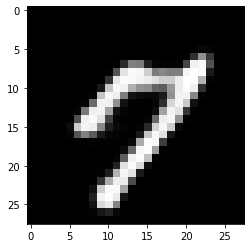

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img[0].reshape(28, 28))
plt.gray()

In [7]:
plt.imsave('test.png', img[0].reshape(28, 28))

In [11]:
import cv2

cv2.imencode('.png', img[0].reshape(28, 28))

(True,
 array([137,  80,  78,  71,  13,  10,  26,  10,   0,   0,   0,  13,  73,
         72,  68,  82,   0,   0,   0,  28,   0,   0,   0,  28,   8,   0,
          0,   0,   0,  87, 102, 128,  72,   0,   0,   0, 121,  73,  68,
         65,  84,  40,  21, 125, 193, 135, 109, 196,  64,  16,   0,  49,
         78, 255,  69, 175,  21,  94,   9,  48, 142, 204,  66,  22, 178,
        144, 133,  44, 100,  33, 255, 106, 108, 242, 214,  56, 100, 108,
        242,  18, 166,  17,  99, 147,  71,  30,  99, 147,  91, 118,  35,
        140,  93,  46,  49, 118,  97, 236, 114, 137, 177, 139, 113, 200,
         79, 140,  93, 140,  83,  78,  49,  14,  49,  78,  57, 132, 177,
        139, 241, 147, 175,  24, 151, 124, 196, 184, 229,  35, 198,  45,
        111,  49,  30, 121, 137, 241, 146,  71, 140, 183, 220,  98, 124,
        228,  18, 198,  71,  46,  49, 190, 114, 137, 241, 149, 133,  44,
        252,   1, 249,  16,  29,  29,  77,  84, 130,  21,   0,   0,   0,
          0,  73,  69,  78,  68, 174,  66,  